### We are trying to call the dataset from the Training.ipynb


In [3]:
%run Training.ipynb

Training Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None
Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


# Before proceeding into texting we will create two new columns 
* One for Stemming
* Second for Lemmatization



The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

### Stemming - Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

In [4]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [5]:
# Created one more columns content_stemmed it shows tweets' stemmed version
train_df['content_stemmed'] = train_df['content_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
train_df['content_stemmed'].head(5)

0    know listenin bad habit earlier start freakin ...
1                 layin bed headach ughhhh waitin call
2                         funer ceremoni gloomi friday
3                                want hang friend soon
4                 want trade someon houston ticket one
Name: content_stemmed, dtype: object

### Lemmatization - Lemmatization is the process of converting a word to its base form.

In [6]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [7]:
# Created one more columns content_lemmatized it shows tweets' lemmatized version
train_df['content_lemmatized'] = train_df['content_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
train_df['content_lemmatized'].head(5)

0    know listenin bad habit earlier started freaki...
1                layin bed headache ughhhh waitin call
2                       funeral ceremony gloomy friday
3                                want hang friend soon
4                want trade someone houston ticket one
Name: content_lemmatized, dtype: object

# Our final dataset after all the processing

In [8]:
 train_df.head(5)

,tweet_id,sentiment,author,content,clean_content,content_token,content_token_filtered,content_stemmed,content_lemmatized
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,know was listenin to bad habit earlier and sta...,"[know, was, listenin, to, bad, habit, earlier,...","[know, listenin, bad, habit, earlier, started,...",know listenin bad habit earlier start freakin ...,know listenin bad habit earlier started freaki...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,layin bed with headache ughhhh waitin on your ...,"[layin, bed, with, headache, ughhhh, waitin, o...","[layin, bed, headache, ughhhh, waitin, call]",layin bed headach ughhhh waitin call,layin bed headache ughhhh waitin call
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]","[funeral, ceremony, gloomy, friday]",funer ceremoni gloomi friday,funeral ceremony gloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends soon,"[wants, to, hang, out, with, friends, soon]","[wants, hang, friends, soon]",want hang friend soon,want hang friend soon
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,we want to trade with someone who has houston ...,"[we, want, to, trade, with, someone, who, has,...","[want, trade, someone, houston, tickets, one]",want trade someon houston ticket one,want trade someone houston ticket one


# Now When Our Data Is Cleaned & Ready We Can Start Our Text Analysis
We will do our analysis on two columns i.e. "content_stemmed" & "content_lematized"

### A ) Will see the most commonly used words for both the columns i.e. "content_stemmed" &                                              "content_lematized"

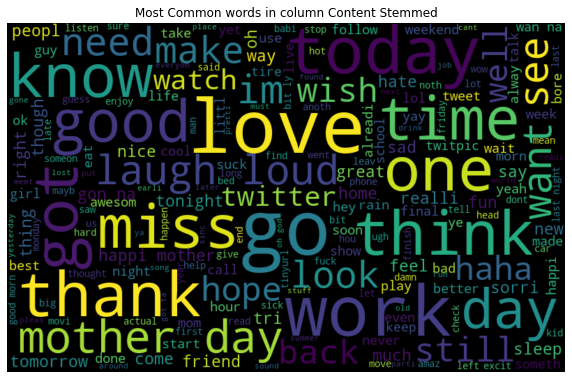

In [9]:
#visualizing all the words in column "column_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in train_df['content_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Content Stemmed")
plt.show()

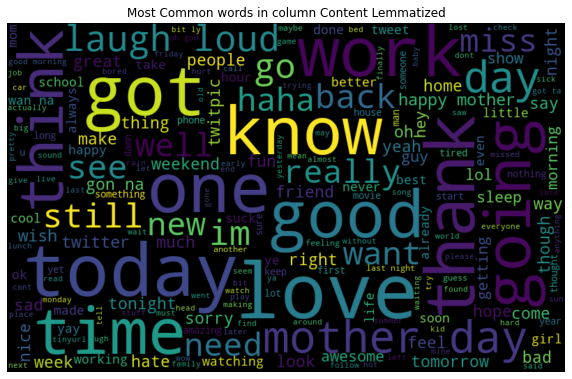

In [10]:
#Visualizing all the words in column "content_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in train_df['content_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Content Lemmatized")
plt.show()

### B) Most common words in the tweets that represnets 'happiness'

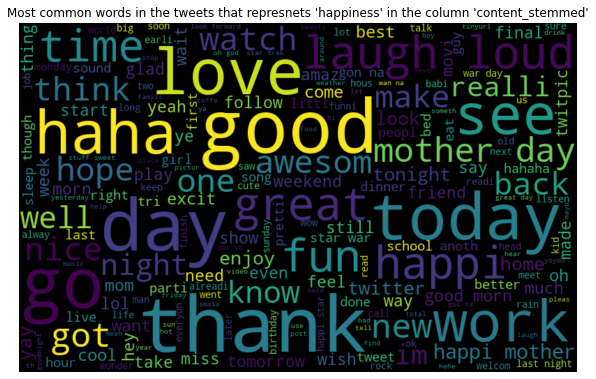

In [11]:
#Visualizing all the normal words in the column 'content_stemmed' which represents happiness
normal_words =' '.join([text for text in train_df['content_stemmed'][train_df['sentiment'] == 'happiness']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words in the tweets that represnets 'happiness' in the column 'content_stemmed'")
plt.show()

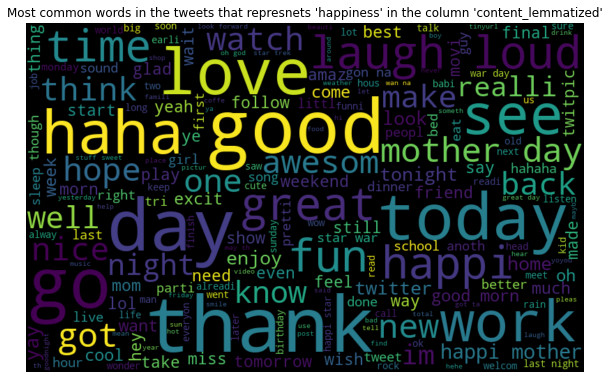

In [12]:
#Visualizing all the normal words in the column 'content_lemmatized' which represents happiness
normal_words =' '.join([text for text in train_df['content_stemmed'][train_df['sentiment'] == 'happiness']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words in the tweets that represnets 'happiness' in the column 'content_lemmatized'")
plt.show()

# In above plots we can see most of the words are with positive attitude . 

### C) Most common words in the tweets that represnets 'hate'

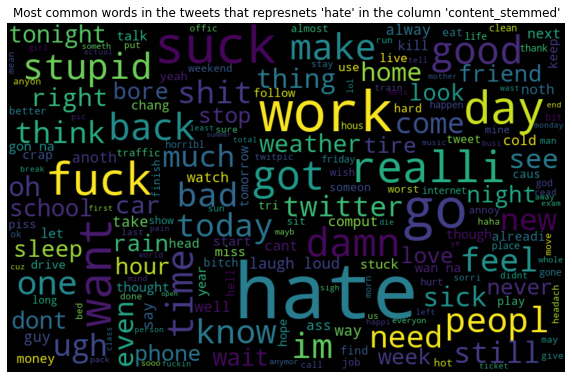

In [14]:
#Visualizing all the normal words in the column 'content_stemmed' which represents hate
normal_words =' '.join([text for text in train_df['content_stemmed'][train_df['sentiment'] == 'hate']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words in the tweets that represnets 'hate' in the column 'content_stemmed'")
plt.show()

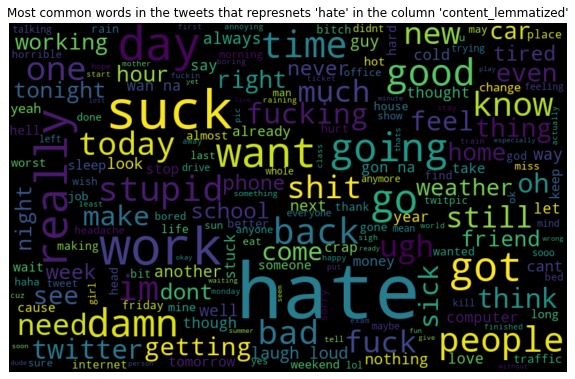

In [15]:
#Visualizing all the normal words in the column 'content_lemmatized' which represents hate
normal_words =' '.join([text for text in train_df['content_lemmatized'][train_df['sentiment'] == 'hate']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words in the tweets that represnets 'hate' in the column 'content_lemmatized'")
plt.show()

# In the above plots we can see most of the words used are with negative attitude.  

# So the tweets by different users are the mixture of different emotions . 